# Section 8 : Markov Chain Monte Carlo (MCMC)



# Gibbs Sampling

Markov Chain Monte Carlo algorithms are a set of algorithms that iteratively form samples from a complex distribution that is otherwise difficult to sample from and estimate. Gibbs Sampling is a MCMC algorithm that provides a way to sample from a complex joint distribution given that we know the underlying conditional distributions. 

Assume we have an $k$-component joint distribution $P(x_1,x_2,\dots,x_k)$ which we do not know how to sample from. However assume we do know the conditional distributions $P(x_i | x_1,\dots,x_{i-1},x_{i+1},\dots,x_k)$. Gibbs Sampling iteratively updates each component given these conditional distributions.

Lets simplify this problem and assume we have a two variable joint distribution $P(X,Y)$ where we cannot evaluate $P(X,Y)$ but we know how to evaluate $P(X | Y)$ and $P(Y | X)$. Now assume we have some initial estimate $(x_0,y_0)$. How could we use the conditional distributions to sample from $P(X,Y)$?

#### Example Problem

Assume we have a bivariate Gaussian but we only know how to sample from a univariate Gaussian distribution. Lets define our bivariate Gaussian as follows:

$$Z = (X,Y) \sim \mathcal{N}\left(0, \begin{bmatrix} 1 & \rho \\ \rho & 1\end{bmatrix}\right)$$

From this we can derive the corresponding conditional distributions:

$$(X | Y=y) \sim \mathcal{N}(\rho y, 1-\rho^2)$$

$$(Y | X=x) \sim \mathcal{N}(\rho x, 1-\rho^2)$$




Now lets use these distributions with our notion of Gibbs Sampling to approximate the joint distribution. First, lets take a look at the joint distribution. The following code samples directly from the bivariate Gaussian so we can use this as a baseline to validate our algorithm.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

In [ ]:
# Randomly samples N points from the bivariate Gaussian with parameter rho

def sampleBivariate(N,rho):
  # mean and covariance 
  mu = np.array([0,0])
  cov = np.array([[1, rho],[rho, 1]])
  # Randomly sample with numpy
  z = np.random.multivariate_normal(mu,cov,size=N)
  return z

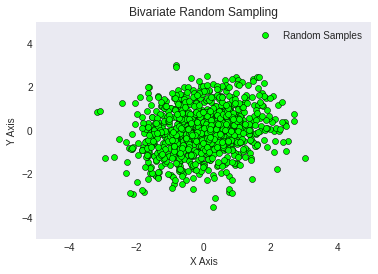

In [ ]:
# Covariance parameter
rho = 0.2

# Randomly sample and plot 1000 points
z = sampleBivariate(1000,rho)
plt.plot(z[:,0],z[:,1], 'o', c='lime',
             markeredgewidth = 0.5,
             markeredgecolor = 'black',label='Random Samples')

plt.xlim([-5,5])
plt.ylim([-5,5])
plt.legend()
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Bivariate Random Sampling')
plt.show()



Above we see a scatter plot estimate of our joint distribution. For a better visual we can also take a look at a contour plot of the level curves. This wil give us a better idea of the shape of our distribution.

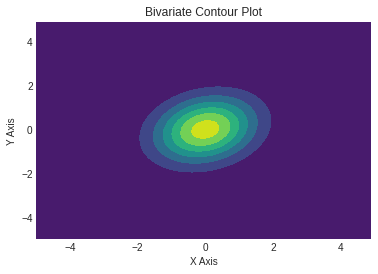

In [ ]:
# Creates a contour plot of joint distribution
x, y = np.mgrid[-5:5:.1, -5:5:.1]
data = np.dstack((x, y))
rv = multivariate_normal([0, 0], [[1, rho], [rho, 1]])
z = rv.pdf(data)
plt.contourf(x, y, z, cmap='viridis')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Bivariate Contour Plot')
plt.show()

Now lets imoplement Gibbs Sampling by filling out the following functions.

$sampleX(x_t,y_t,\rho)$ should take in the current iterates and randomly sample a new point $x_{t+1}$ from the conditional distribution of $X$ given $Y$.

$sampleY(x_t,y_t,\rho)$ should take in the current iterates and randomly sample a new point $y_{t+1}$ from the conditional distribution of $Y$ given $X$.



In [ ]:
def sampleX(xt,yt,rho):
  mu = rho * yt
  std = 1 - rho * rho
  return np.random.normal(mu,std)

def sampleY(xt,yt,rho):
  mu = rho * xt
  std = 1 - rho * rho
  return np.random.normal(mu,std)


We have implemented functions to generate our samples from the conditional distributions. Now its time to implement Gibbs sampling. To do this lets fill out the following two functions:

$singleUpdate(x_t,y_t,\rho)$ performs a single update that randomly samples the next iterate given the conditional distributions. This function should return the next sample $(x_{t+1},y_{t+1})$.

$gibbsSampling(x_0,y_0,\rho,N)$ performs a full run of $N$ iterations of Gibbs sampling. This function should use the helper function $singleUpdate()$ to iterative sample $N$ points and should return an $N \times 2$ numpy array storing each of the sampled points.

In [ ]:
def singleUpdate(xt,yt,rho):
  ynew = sampleY(xt,yt,rho)
  xnew = sampleX(xt,ynew,rho)
  return xnew,ynew

def gibbsSampling(x0,y0,rho,N):
  x = [x0]
  y = [y0]

  xt = x0
  yt = y0
  for i in range(N):
    xt,yt = singleUpdate(xt,yt,rho)
    x.append(xt)
    y.append(yt)
  
  x = np.array(x).reshape(-1,1)
  y = np.array(y).reshape(-1,1)

  return np.concatenate((x,y),axis=1)

Now lets take a look at the results. Here is a plot of the initial starting point $(0,0)$ and the first 10 sampled points using Gibbs sampling. The second plot below shows the final distribution of our Gibbs samples.

In [ ]:
samples = gibbsSampling(0,0,rho,1000)

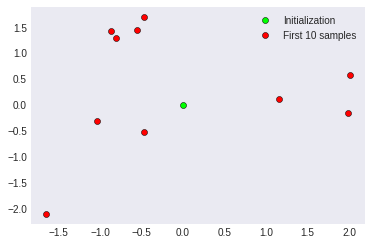

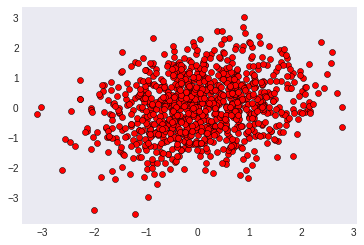

In [ ]:
plt.clf()
plt.plot(samples[0,0],samples[0,1],'o', c='lime',markeredgewidth = 0.5,
            markeredgecolor = 'black',label='Initialization')
plt.plot(samples[1:11,0],samples[1:11,1],'o', c='red',markeredgewidth = 0.5,
            markeredgecolor = 'black',label='First 10 samples')
plt.legend()
plt.show()

plt.clf()
plt.plot(samples[:,0],samples[:,1],'o', c='red',
           markeredgewidth = 0.5, markeredgecolor = 'black',label='Gibbs Distribution')
plt.show()

Now lets compare our Gibbs distribution to the original true bivariate distribution. What do you notice? Is the Gibbs distribution a good estimator of the joint distribution?

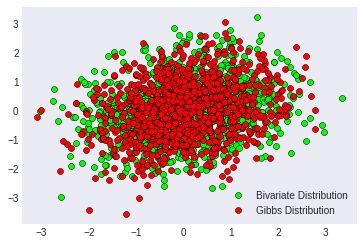

Bivariate Distribution Mean: [0.01172066 0.04330782]
Gibbs Distribution Mean: [0.04545729 0.034564  ]


In [ ]:
plt.clf()

z = sampleBivariate(1000,rho)
plt.plot(z[:,0],z[:,1],'o', c='lime',
             markeredgewidth = 0.5, markeredgecolor = 'black',label='Bivariate Distribution')
plt.plot(samples[:,0],samples[:,1],'o', c='red',
           markeredgewidth = 0.5, markeredgecolor = 'black',label='Gibbs Distribution')

plt.legend()
plt.show()
print(f"Bivariate Distribution Mean: {np.mean(z,axis=0)}")
print(f"Gibbs Distribution Mean: {np.mean(samples,axis=0)}")

Lastly lets take a look at how the shape of our Gibbs distribution compares to the contour plot we saw before. Does the Gibbs distribution have the correct shape? 

What are some benefits and drawbacks of Gibbs sampling? How could we improve upon some of the drawbacks?

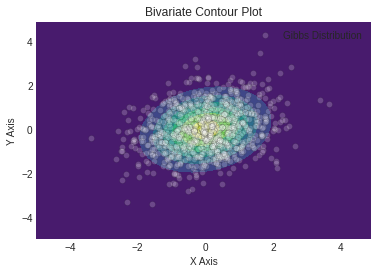

In [ ]:
x, y = np.mgrid[-5:5:.1, -5:5:.1]
data = np.dstack((x, y))
rv = multivariate_normal([0, 0], [[1, rho], [rho, 1]])
z = rv.pdf(data)
plt.plot(samples[:,0],samples[:,1],'o', c='white',alpha=0.2,
           markeredgewidth = 0.5, markeredgecolor = 'black',label='Gibbs Distribution')
plt.contourf(x, y, z, cmap='viridis')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Bivariate Contour Plot')
plt.legend()
plt.show()